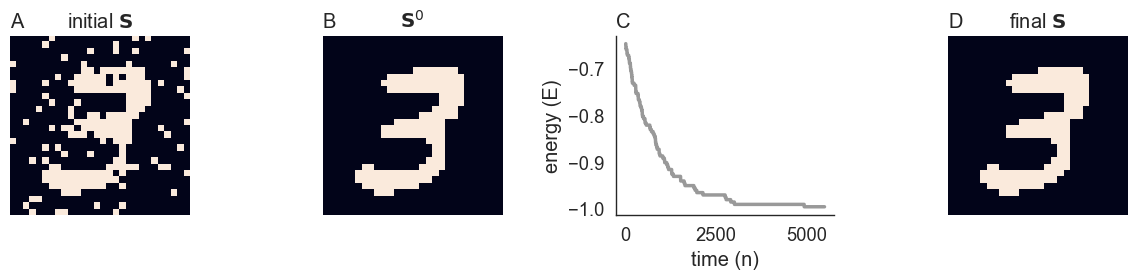

In [2]:
###############################################
## Import packages and specify some settings ##
###############################################
# Import packages
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# This makes plots show up and look nice
#matplotlib inline
sns.set(context='paper',style='white',font_scale=1.5,rc={"lines.linewidth":2.5})
sns.set_palette('muted')

###############################################
###############################################

# For computing runtimes
from time import time as tm

# Seed random number generator so that
# we get the same results every time
# we run this code
np.random.seed(7)


# Load the data from a file
try:
    data = np.load('../DataFiles/MNISTdata.npz', allow_pickle=True)
except:
    url = "https://raw.githubusercontent.com/RobertRosenbaum/ModelingNeuralCircuits/master/DataFiles/MNISTdata.npz"
    file = np.DataSource().open(url)
    data = np.load(file.name, allow_pickle=True)
X=data['X']

# Attractor pattern
i=7
S0=np.zeros(28*28)
S0[X[:,i]>.5]=1
S0[X[:,i]<=.5]=-1

# Dimension of s
N=len(S0)

# Define a W that will have S0 as its minimal energy state
W=(1/N**2)*(np.outer(S0,S0)-np.diag(S0))


S=S0.copy()
NumPixelsToPerturb=80
Inds=np.random.randint(N,size=NumPixelsToPerturb)
#Inds0=np.random.randint(5,size=(2,NumPixelsToPerturb))
#Inds=(Inds0[0]+1)*7+(Inds0[1]+1)
S[Inds]=-S[Inds]
Sinit=S.copy()

# Compute Hopfield dynamics
T=5500
E=np.zeros(T)
for n in range(T):

    # Compute the energy
    E[n]=-np.sum((S.T)@W@S)

    # Compute the input
    I=W@S

    # Choose a random neuron
    # and update its state
    j=np.random.randint(N)
    S[j]=np.sign(I[j])


# Make figure
plt.subplots(1,4,figsize=(12, 3))

plt.subplot(1,4,1)
plt.imshow(Sinit.reshape(28,28))
plt.axis('off')
plt.title('A',loc='left')
plt.title(r'initial $\mathbf{S}$',loc='center')
sns.despine()

plt.subplot(1,4,2)
plt.imshow(S0.reshape(28,28))
plt.axis('off')
plt.title('B',loc='left')
plt.title(r'$\mathbf{S}^0$',loc='center')
sns.despine()


plt.subplot(1,4,3)
plt.plot(np.arange(0,T),E,color=[.6,.6,.6])
#plt.ticklabel_format(axis="x", style="sci",scilimits=(0,0))
#plt.ticklabel_format(axis="y", style="sci",scilimits=(0,0))
plt.xlabel('time (n)')
plt.ylabel('energy (E)')
plt.title('C',loc='left')
sns.despine()


plt.subplot(1,4,4)
plt.imshow(S.reshape(28,28))
plt.axis('off')
plt.title('D',loc='left')
plt.title(r'final $\mathbf{S}$',loc='center')
sns.despine()




plt.tight_layout()
